In [1]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt
import collections 
def makehash():
    return collections.defaultdict(makehash)
import fnmatch 
import torch 
from tqdm import tqdm 

In [22]:
# load training data 
training_files=[]
for file in os.listdir(os.path.join(save_dir,model_identifier)):
    if fnmatch.fnmatch(file, '*.pth'):
            training_files.append(os.path.join(save_dir,model_identifier,file))

hier_accu=[]
for idx, files in tqdm(enumerate(training_files)):
    test=torch.load(files)
    hier_accu.append([test['epoch'],test['batchidx'], test['hier_test_acc']])

1060it [00:08, 125.24it/s]


In [24]:
# load distance data 
from utils import save_dir, analyze_dir, result_dir
model_identifier = 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed'
data_=pickle.load(open(os.path.join(save_dir,model_identifier, f'{model_identifier}_distance_pooled.pkl'),'rb'))


In [3]:
# get model training and testing results 

model_train_acc=f'acc_train_{model_identifier}.csv'
model_test_acc=f'acc_test_{model_identifier}.csv'
train=open(os.path.join(save_dir,model_identifier,model_train_acc),'r')
train_lines=[float(x) for x in train.read().splitlines()]
train.flush()
test=open(os.path.join(save_dir,model_identifier,model_test_acc),'r')
test_lines=[float(x) for x in test.read().splitlines()]
test.flush()

In [4]:
dummy=[]
epochs=[]
batches=[]
for k,item in data_['distance_results']['layer_1_Linear'][0].items():
    epochs.append(item['epoch'])
    batches.append(item['batchidx'])
    dummy.append(item['epoch']*10000+item['batchidx'])

In [5]:
fixed_idx=np.argsort(dummy)

In [6]:
layer_dist_over_time=[]

for layer in data_['distance_results'].keys():
    hier_distance_over_time=[]
    for hier in data_['distance_results'][layer].keys():
        distance_over_time=[]
        if hier!='epoch':
            for key,item in data_['distance_results'][layer][hier].items():
                distance_over_time.append(item['distance'].mean(axis=1))
            hier_distance_over_time.append(dict(data=np.stack(distance_over_time),id=item['identifier']))
    layer_dist_over_time.append(hier_distance_over_time)

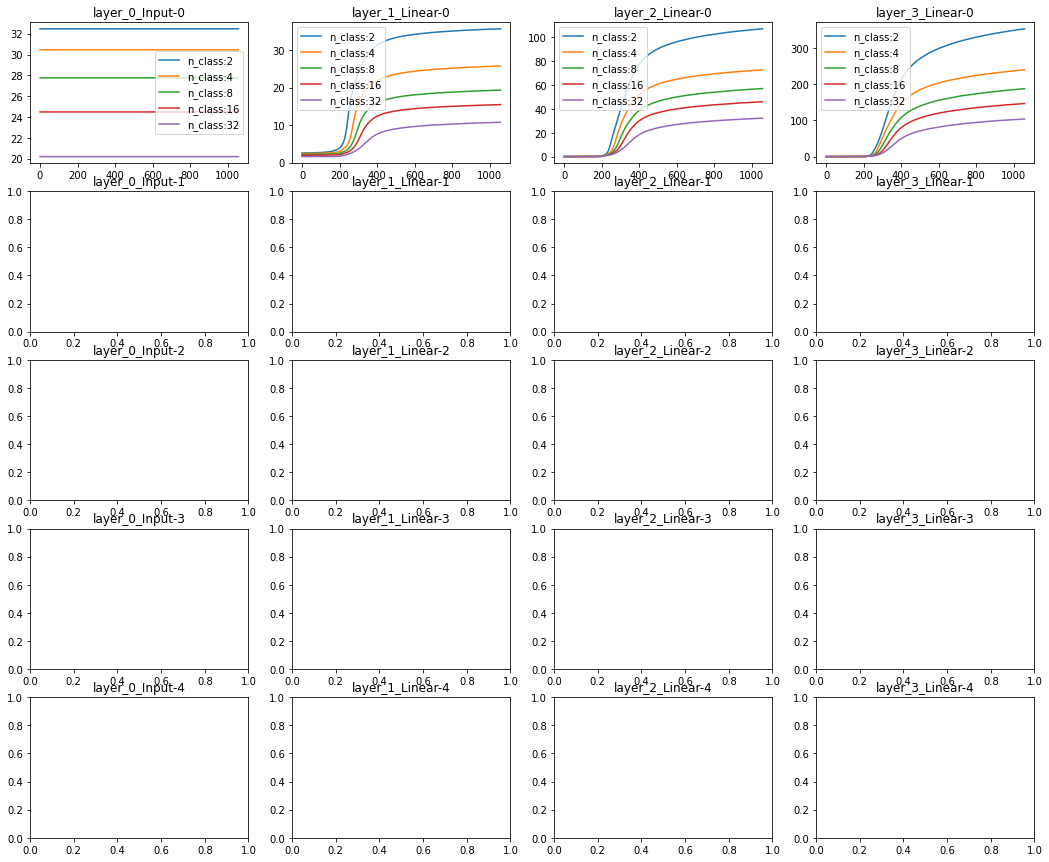

In [7]:
fig, axes = plt.subplots(len(layer_dist_over_time[0]), len(layer_dist_over_time), figsize=(18, 15))

for k,layer_data in enumerate(layer_dist_over_time):
        for m, hier_data in enumerate(layer_data):
                axes[m,k].set_title(f"{list(data_['distance_results'].keys())[k]}-{list(data_['distance_results']['layer_0_Input'].keys())[m]}")
                #axes[0,k].plot(hier_data.mean(axis=1)[fixed_idx])
                axes[0,k].plot(hier_data['data'].mean(axis=1),label=f"n_class:{hier_data['data'].shape[1]}")
                axes[0,k].legend()

# Hierarchical accurary

In [8]:
from utils import save_dir, analyze_dir


In [9]:
train_files=



SyntaxError: invalid syntax (<ipython-input-9-29ba62b9d4ec>, line 1)

In [10]:
training_files=[]
for file in os.listdir(os.path.join(save_dir,model_identifier)):
    if fnmatch.fnmatch(file, '*.pth'):
            training_files.append(os.path.join(save_dir,model_identifier,file))


In [11]:
test=torch.load(training_files[1])

In [12]:
test['hier_train_acc']

[3.125, 0.0, 12.5, 9.375, 15.625, 31.25]

In [13]:
hier_accu=[]
for idx, files in tqdm(enumerate(training_files)):
    test=torch.load(files)

    hier_accu.append([test['epoch'],test['batchidx'], test['hier_test_acc']])


1060it [00:21, 48.79it/s]


In [14]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [15]:
dummy=[]
epochs=[]
batches=[]
for item in hier_accu:
    epochs.append(item[0])
    batches.append(item[1])
    dummy.append(item[0]*10000+item[1])
fixed_idx=np.argsort(dummy)


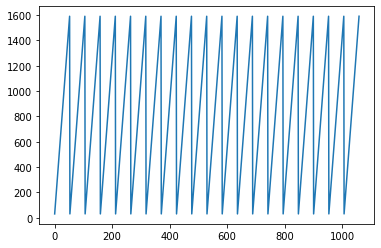

In [16]:
plt.plot(batches)

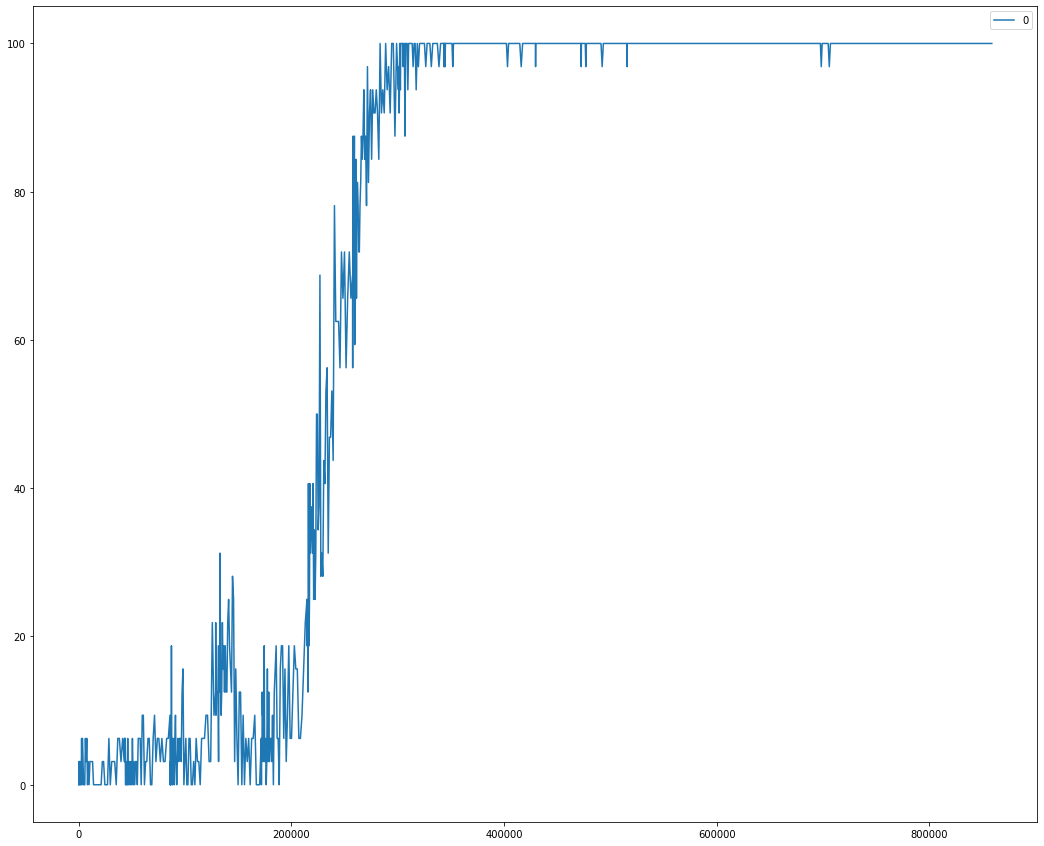

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(18, 15))
X=np.stack([x[2] for x in hier_accu])

for idx in range(1):#X.shape[1]):

    axes.plot(np.cumsum(batches),moving_average(X[fixed_idx,idx],1),label=idx)
    axes.legend()


In [19]:
for i in range(layer_cap.shape[1]):
            im=axes[4+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[4+j].set_ylabel(r'$\alpha_M$', fontsize=18)
    axes[4+j].set_xlim(min(seq), max(seq))
    axes[4+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    #axes[4+j].legend()
    axes[4+j].set_title(key)
    #fig.colorbar(im, ax=axes[4*(k+1)])

idx=8
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['radii'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$R_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))

    axes[idx+j].set_title(key)

idx=12
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['dimensions'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$D_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    
    axes[idx+j].set_title(key)

idx=16
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['correlations'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$\rho_{center}$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    axes[idx+j].legend()
    axes[idx+j].set_title(key)

plt.suptitle(model_identifier)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_hierarchy_vals_during_training.png'),transparent=True)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

NameError: name 'model_train_test_acc' is not defined

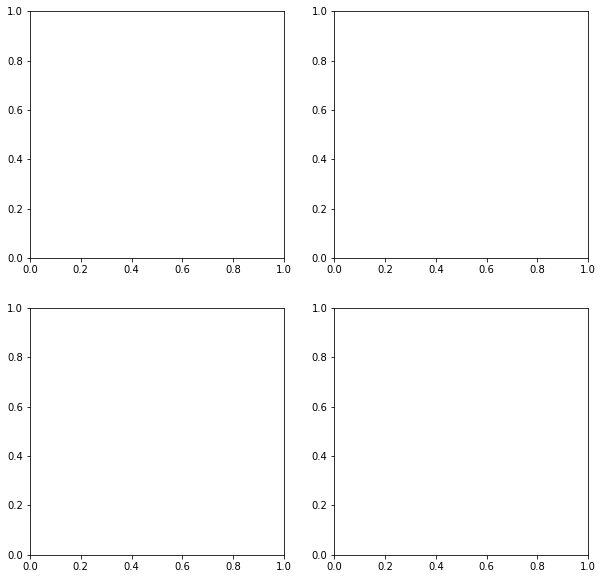

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes=axes.flatten()
st='partition'
ncl=64
ax=axes[0]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='partition'
ncl=96
ax=axes[1]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='tree'
ncl=64
ax=axes[2]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

st='tree'
ncl=96
ax=axes[3]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

ax.set_xlabel('sigma',fontsize=14)
ax.set_ylabel('beta',fontsize=14)
plt.suptitle('test accuracy',fontsize=16,fontweight='bold')
fig.tight_layout()

if not os.path.exists(os.path.join(result_dir,'training_result')):
        os.mkdir(os.path.join(result_dir,'training_result'))
fig.savefig(os.path.join(result_dir,'training_result',f'test_accu_structures:partition,tree_betas:{b_val.min()},{b_val.max()}_sigmas:{s_val.min()},{s_val.max()}.png'),transparent=True)